## Data Preprocessing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [4]:
filename = 'heart_cleveland_upload.csv'
df = pd.read_csv(filename)

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [5]:
# Show basic info
print(df.info())  # Check for missing values and data types
print(df.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.1

### Histograms

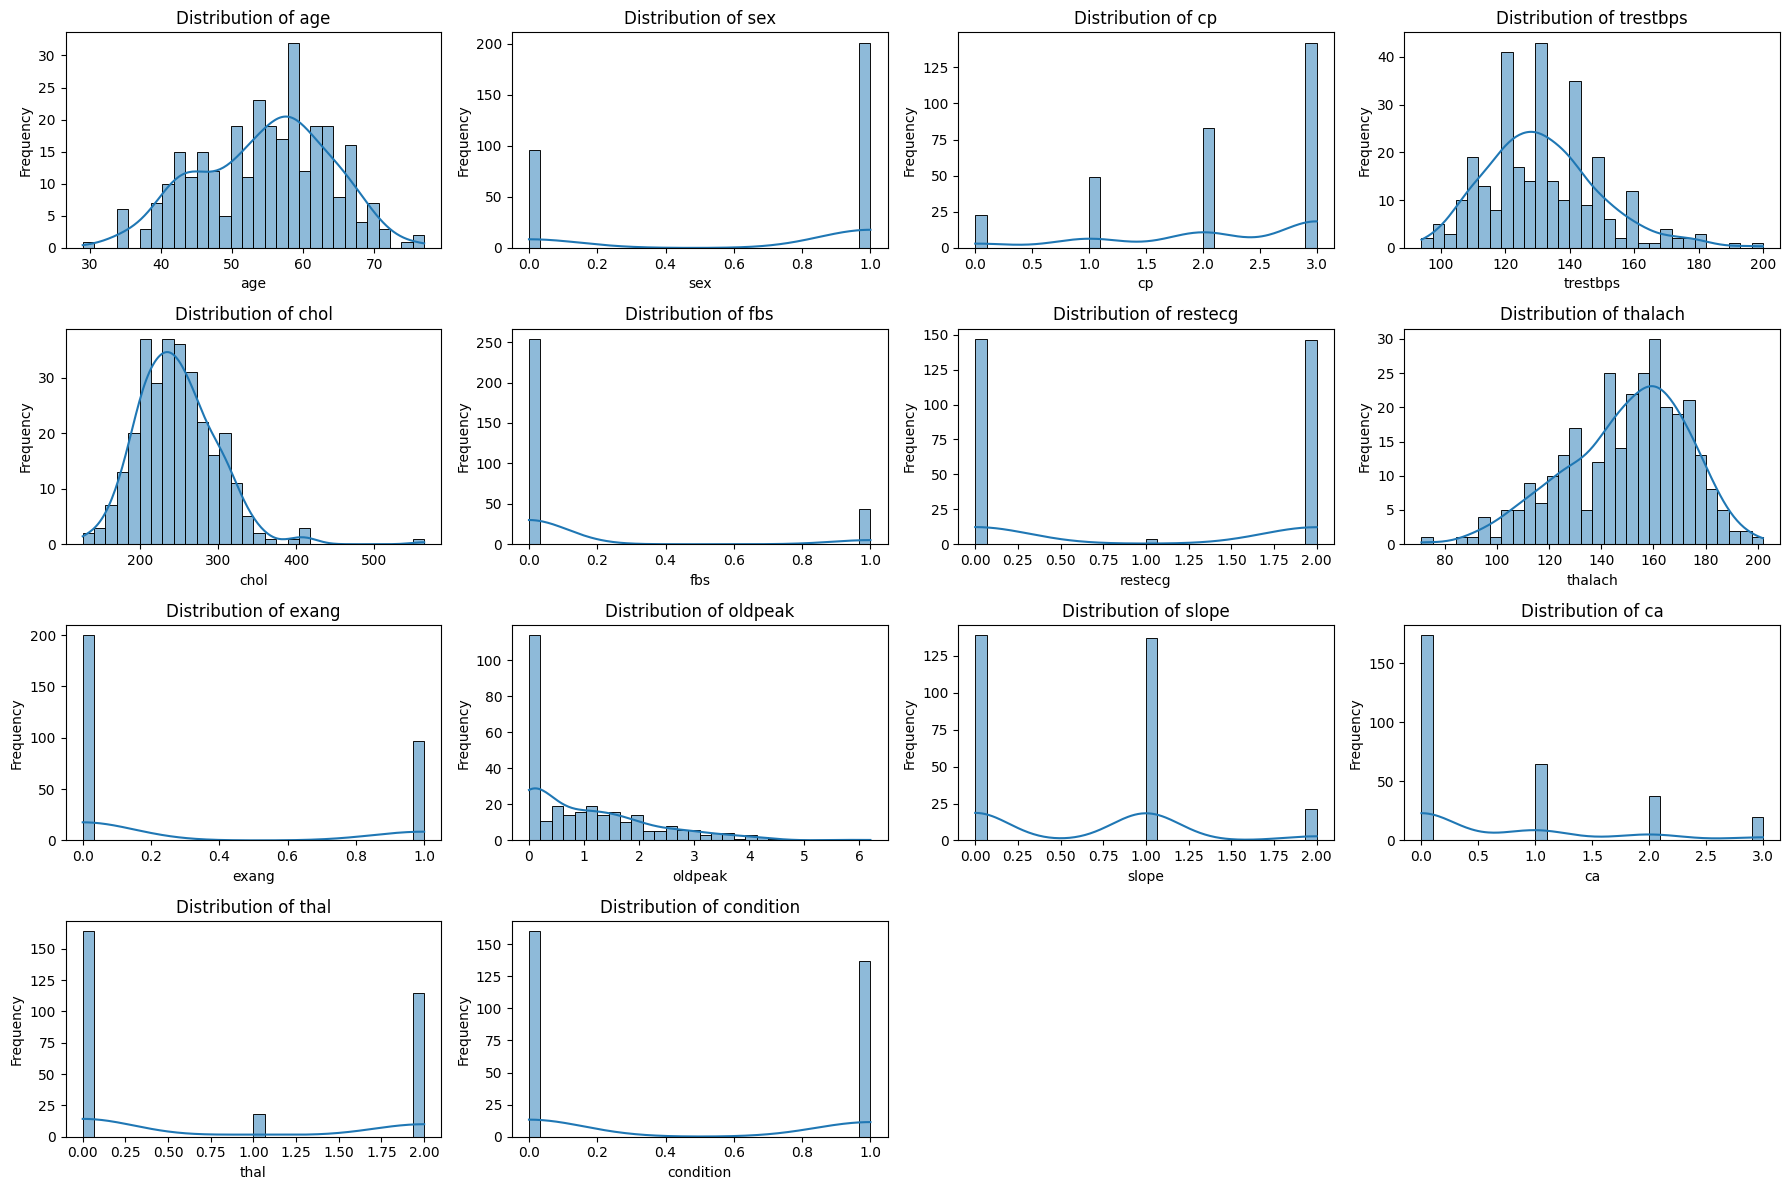

In [6]:
rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [7]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding

In [9]:
print(df['thal'])

0      0
1      0
2      0
3      0
4      0
      ..
292    2
293    2
294    2
295    0
296    2
Name: thal, Length: 297, dtype: int64


### Split data into Train and Test Set

In [26]:
# separate data from labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### At end, we have train: 64%, validation 16% and test 20%

In [28]:
# Split data into train and test set: 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training data into train and validation set: 80:20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [29]:
print(f"Training Set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation Set: X_val={X_val.shape}, y_val={y_val.shape}")
print(f"Test Set: X_test={X_test.shape}, y_test={y_test.shape}")

Training Set: X_train=(189, 13), y_train=(189,)
Validation Set: X_val=(48, 13), y_val=(48,)
Test Set: X_test=(60, 13), y_test=(60,)
